In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('blackFriday_train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [5]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [6]:
df.drop('User_ID', axis=1, inplace=True)

In [7]:
df.head(2)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


In [8]:
#df['Gender']= pd.get_dummies(df['Gender'],drop_first=1)
#df.head(3)

In [9]:
df['Gender']= df['Gender'].map({'F':0, 'M':1})
df.head(3)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422


In [10]:
df['Age'].value_counts()

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

In [11]:
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [12]:
#pd.get_dummies(df['Age'],drop_first=True)
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [13]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969


In [14]:
##second technqiue
from sklearn.preprocessing import LabelEncoder

# label_encoder object knows how to understand word labels.

label_encoder = LabelEncoder()


# Encode labels in column 'species'.

df['Age']= label_encoder.fit_transform(df['Age'])
 
df['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1], dtype=int64)

In [15]:
df.City_Category.value_counts()

City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64

In [16]:
##fixing categorical City_categort
df_city=pd.get_dummies(df['City_Category'],drop_first=True)

In [17]:
df_city.head(2)

,B,C
0,False,False
1,False,False


In [18]:
df= pd.concat([df,df_city], axis=1)
df.head(3)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370,False,False
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200,False,False
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422,False,False


In [19]:
##drop City Category Feature
df.drop('City_Category',axis=1,inplace=True)

In [20]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
B                                  0
C                                  0
dtype: int64

In [21]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [22]:
df['Product_Category_2'].value_counts()

Product_Category_2
8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: count, dtype: int64

In [23]:
df['Product_Category_2'].mode()

0    8.0
Name: Product_Category_2, dtype: float64

In [24]:
df['Product_Category_2'].mode()[0]

8.0

In [25]:
df['Product_Category_2']= df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [26]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,8.0,NaN,8370,False,False
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200,False,False
2,P00087842,0,0,10,2,0,12,8.0,NaN,1422,False,False
3,P00085442,0,0,10,2,0,12,14.0,NaN,1057,False,False
4,P00285442,1,6,16,4+,0,8,8.0,NaN,7969,False,True


In [27]:
df['Product_Category_2'].isnull().sum()

0

In [28]:
## Replace the missing values with mode
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [29]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [30]:
df['Stay_In_Current_City_Years']= df['Stay_In_Current_City_Years'].str.replace('+','')

In [32]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [33]:
##convert object into integers
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  int32  
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
 10  B                           550068 non-null  bool   
 11  C                           550068 non-null  bool   
dtypes: bool(2), float64(2), int32(1), int64(6), object(1)
memory usage: 40.9

In [34]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,8.0,16.0,8370,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200,0,0
2,P00087842,0,0,10,2,0,12,8.0,16.0,1422,0,0
3,P00085442,0,0,10,2,0,12,14.0,16.0,1057,0,0
4,P00285442,1,6,16,4,0,8,8.0,16.0,7969,0,1


C:\Users\RAKSHANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

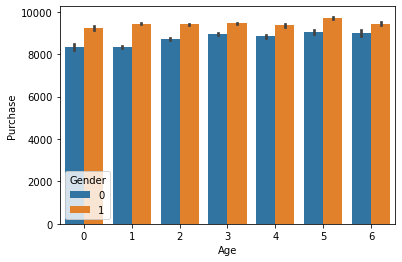

In [36]:
##Visualisation Age vs Purchased
sns.barplot('Age','Purchase',hue='Gender',data=df)

C:\Users\RAKSHANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

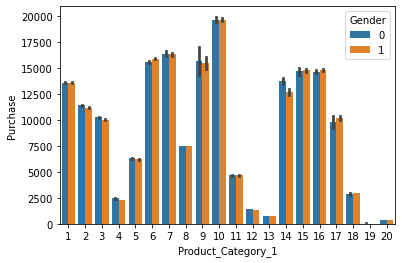

In [38]:
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df)

C:\Users\RAKSHANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

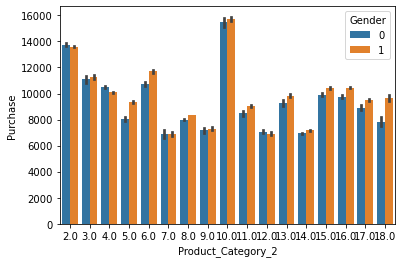

In [39]:
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=df)

C:\Users\RAKSHANDA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

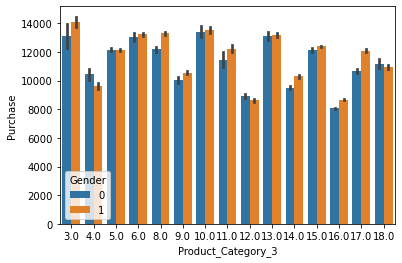

In [40]:
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=df)